In [1]:
## Importing Needed packages

import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sb
%matplotlib inline

In [2]:
## Reading the data in and make a copy

df = pd.read_csv("house.csv")
df2=df.copy()

In [3]:
## Data Exploration

df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [4]:
# Converting Area to numeric 

df2['Area'] = df['Area'].replace(r'[^0-9]+', '', regex=True)
df2['Area'] = df2['Area'].apply(pd.to_numeric)

In [5]:
# Delete Nun Value 

df2.dropna()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67


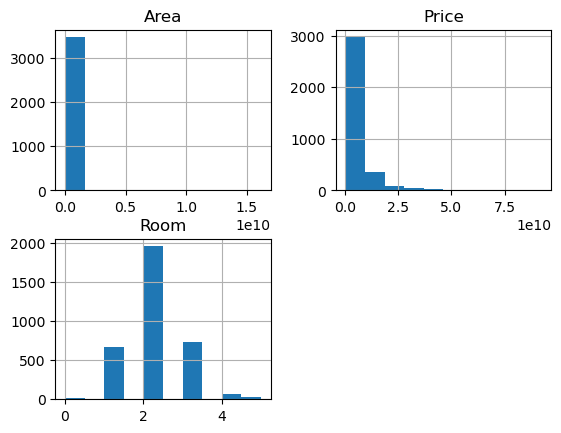

In [6]:
# Histogram chart for important variables
viz = df2[['Area','Price','Room']]
viz.hist()
plt.show()

# Need Clean and Normalize

In [7]:
##Cleaning up Data from Outliers

q1=df2['Area'].quantile(.25)
q3=df2['Area'].quantile(.75)
iqr=q3-q1
for i in df2.index:
    if df2.loc[i,'Area'] > (q3+(1.5*iqr)) or df2.loc[i,'Area'] < (q1-(1.5*iqr)) :
        df2.drop(i , inplace=True)
        

q1=df2['Price'].quantile(.25)
q3=df2['Price'].quantile(.75)
iqr=q3-q1
for i in df2.index:
    if df2.loc[i,'Price'] > (q3+(1*iqr)) or df2.loc[i,'Price'] < (q1-(1*iqr))  or df2.loc[i,'Price'] < 50000000:
        df2.drop(i , inplace=True)        

In [8]:
## Define a new Variable : Price Per Meter(PPM)
df2['PPM']=df2['Price']/df2['Area']    
q1=df2['PPM'].quantile(.25)
q3=df2['PPM'].quantile(.75)
iqr=q3-q1
for i in df2.index:
    if df2.loc[i,'PPM'] > (q3+(1.5*iqr)) or df2.loc[i,'PPM'] < (q1-(1.5*iqr)) :
        df2.drop(i , inplace=True)

In [9]:
## Converting Address to Numerical value

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
le.fit(df2['Address'])
LabelEncoder()
ad=le.classes_
df2['Add'] = le.fit_transform(df2.Address)




In [10]:
# Converting Parking , Warehouse and Elevator to Numerical value

df2["Parking"] = df2["Parking"].astype(int)
df2["Warehouse"] = df2["Warehouse"].astype(int)
df2["Elevator"] = df2["Elevator"].astype(int)

In [11]:
## Normalize Price , Area and PPM
## Define a new variable called bonus for converting House Options to a Value


df2['Point'] = df2['Room']+df2['Parking']+df2['Warehouse']+df2['Elevator']
Maxprice = df2['Price'].abs().max()
Maxarea = df2['Area'].abs().max()
for column in df2.columns: 
    df2['Pricen'] = df2['Price']  / df2['Price'].abs().max()
    df2['Arean'] =  df2['Area']  / df2['Area'].abs().max()
    df2['Bonous'] = 10*(df2['Room'] + df2['Parking'] + df2['Elevator'] + df2['Warehouse'])
    df2['PPMn'] = df2['PPM']  / df2['PPM'].abs().max()

In [12]:
## Define new Function to Access Real Price From Normalized Price


def Dnormal (x) :
    return x * Maxprice


## visualizing data

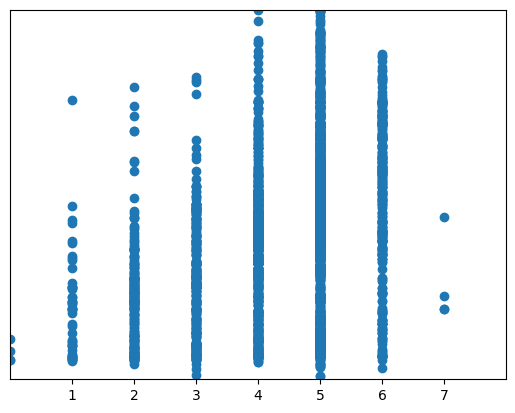

In [13]:
fig, ax = plt.subplots()

ax.scatter(df2['Point'], df2['PPMn'])

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 1), yticks=np.arange(1, 1))

plt.show()

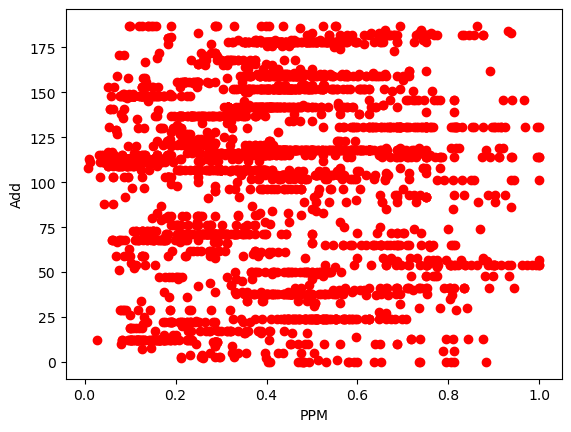

In [14]:
plt.scatter(df2.PPMn, df2.Add, color='red')
plt.xlabel("PPM")
plt.ylabel("Add")
plt.show()

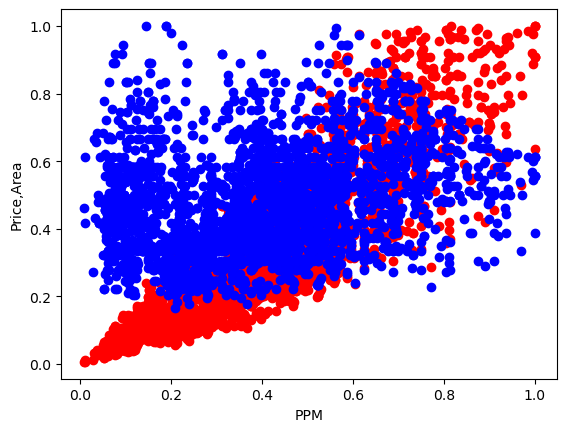

In [15]:
plt.scatter(df2.PPMn ,df2.Pricen, color='red')
plt.scatter(df2.PPMn ,df2.Arean, color='Blue')
plt.xlabel("PPM")
plt.ylabel("Price,Area")
plt.show()

In [16]:
## Address data extraction and classification
## ( Need less then 1 min - Need to optimaze Algorithm )

## Add New Column For Flag
counter=0
for i in df2['Area'] :
    df2['Flag']=0
    df2['Index']=counter
    counter+=1
    
    
Count=dict()
Sum=dict() 
i=0
print('Please wait until the End message is displayed',i)
for i, row in df2.iterrows():
    if  df2.loc[i,'Flag'] == 0 :
        for j, row in df2.iterrows(): 
            if (df2.loc[i, 'Add'] == df2.loc[j, 'Add']) and ( df2.loc[j,'Flag'] == 0):
                df2.loc[j,'Flag']=1
                if df2.loc[i, 'Add'] in Count :
                    Count[df2.loc[i,'Add']] += 1
                else :
                     Count[df2.loc[i,'Add']] = 1
                if df2.loc[i, 'Add'] in Sum :
                    Sum[df2.loc[i, 'Add']] += df2.loc[i, 'PPMn']
                else :
                    Sum[df2.loc[i, 'Add']] = df2.loc[i, 'PPMn']
print('End')


Please wait until the End message is displayed 0
End


In [17]:
## New Variable for Store Avarage Price Per Meter Per Address!!

Adavg=dict()
for i in Count :  
    Adavg[i]=Sum[i]/Count[i]

In [18]:
## Appointment of quantity for Address In Dataframe (Price Per Address PPM)
df2['PPA']=0
for i, row in df2.iterrows():
    df2.loc[i,'PPA'] = Adavg[df2.loc[i, 'Add']]

# Lets Test!
## with Mulitple-Linear-Regression 
### R2_Score shown is the average of one hundred R2_Score calculations With Different Data

In [19]:


from sklearn import linear_model
from sklearn.metrics import r2_score
regr = linear_model.LinearRegression()
sum=0
for i in range(100) :
    msk = np.random.rand(len(df2)) < 0.8
    train = df2[msk]
    test = df2[~msk]
    train_x = np.asanyarray(train[['Area','PPA','Bonous']])
    train_y = np.asanyarray(train[['Price']])
    regr.fit (train_x, train_y)
    test_x = np.asanyarray(test[['Area','PPA','Bonous']])
    test_y = np.asanyarray(test[['Price']])
    test_y_ = regr.predict(test_x)
    test_y_ = regr.predict(test_x)
    sum += r2_score(test_y , test_y_)
print("R2-score: " ,sum/100)
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))

R2-score:  0.7469095189809366
Coefficients:  [[3.04655811e+07 5.79707577e+09 1.63081732e+07]]
Intercept:  [-2.67917482e+09]
Mean absolute error: 756994211.59
Residual sum of squares (MSE): 1229699321393842688.00


##End